# Perceptron monocapa

Un perceptrón monocapa está compuesto de una capa pasiva de entrada, y una sola capa activa que también sirve de capa de salida.

El input de un perceptron determina el estado de las neuronas pasivas de la capa de entrada, $x$.
Se considera, además, una neurona pasiva de estado fijo $x_{n_e}=-1$, para que haga las veces de umbral de activación.
Ante una entrada $x$, la salida de la red neuronal viene dada por
$$
y_j(x)
=
g(h_{j}(x))
$$
donde
$$
h_j
=
%\sum_{i=1}^{n_e}
\sum_i
w_{ji}x_i
$$
para $j=1,...,n_s$, y $g$ es una función de activación.
Por ejemplo, una ReLU, la cual viene dada por
$g(h) = h$ si $h>0$ y $g(h)=0$ si $h\leq 0$.

Para entrenar la red, usamos como función costo el error cuadrático sobre el conjunto de entrenamiento $\{e_m,s_m:m=1,...,M\}$, al cuál lo expresamos como una función de $w$
$$
E(w)
=
\frac{1}{2}
%\sum_{m=1}^M
\sum_{m}
%\sum_{j=1}^{n_s}
\sum_{j}
(y_{jm}(w)-s_{mj})^2
$$
donde $s_{mj}$ es la salida deseada en la $j$-ésima neurona ante el $m$-ésimo ejemplo, $y_{mj}$ es la salida obtenida en la $j$-esima neurona ante el $m$-ésimo ejemplo, y $n_s$ es el número de neuronas de salida.
Por otro lado,
$$
y_{jm}(w)
=
g(h_{jm}(w))
$$
donde
$$
h_{jm}(w)
=
\sum_{i=0}^{n_e}
w_{ji}e_{mi}
$$
Nos interesa calcular el gradiente de $E(w)$
\begin{eqnarray}
\frac{\partial E}{\partial w_{pq}}
&=&
%\sum_{m=1}^M
\sum_m
%\sum_{j=1}^{n_s}
\sum_j
(y_{jm}(w)-s_{mj})
\frac{\partial y_{jm}}{\partial w_{pq}}
\\
&=&
%\sum_{m=1}^M
\sum_m
%\sum_{j=1}^{n_s}
\sum_j
(y_{jm}(w)-s_{mj})
g'(h_{jm}(w))
\frac{\partial h_{jm}}{\partial w_{pq}}
\\
&=&
%\sum_{m=1}^M
\sum_m
%\sum_{j=1}^{n_s}
\sum_j
(y_{jm}(w)-s_{mj})
g'(h_{jm}(w))
\delta_{jp}
e_{mq}
\\
&=&
%\sum_{m=1}^M
\sum_m
(y_{pm}(w)-s_{mp})
g'(h_{pm}(w))
e_{mq}
\end{eqnarray}
puesto que
$$
\frac{\partial h_{jm}}{\partial w_{pq}}
=
%\sum_{i=1}^{n_e}
\sum_i
\frac{w_{ji}}{w_{pq}}
e_{mi}
=
%\sum_{i=1}^{n_e}
\sum_i
\delta_{jp}
\delta_{iq}
e_{mi}
=
\delta_{jp}
e_{mq}
$$

Recordar que, en el caso de una ReLU, $g'(h)=\Theta(h)$, donde $\Theta(h)=1$ si $h>0$ y $\Theta(h)=0$ si $h\leq 0$.

Para actualizar los pesos sinápticos en la $(\tau+1)$-ésima época de entrenamiento, utilice la regla
$$
w^{\tau}_{ji} \to w^{\tau+1}_{ji} = w^{\tau}_{ji} - \eta \frac{\partial E}{\partial w_{ji}}
$$
para todo $ji$.

## **Ejercicio 1**

Genere un conjunto de entrenamiento compuesto por $M$ puntos en $\mathbb{R}^{n_e}$, distribuidos en $n_s$ nubes, con $m_c$ puntos en la nube $c$.
Notar que $c=1,...,n_e$ nubes y, en total, se generarán $M=\sum_c m_c$ puntos.

Para generar las nubes:

* genere aleatoriamente $n_s$ puntos en $\mathbb{R}^{n_e}$ a los que llamaremos centros, sorteando los valores de las coordenadas a partir de una distribución normal, y

* para cada centro $c$, genere $m_c$ puntos aleatorios alrededor del mismo, sumando sus coordenadas a números aleatorios generados con una Gaussiana de desviación estandard $\sigma=0.1$.

Las $n_e$ coordenadas del $m$-ésimo punto constituirán el vector de entrada del $m$-ésimo ejemplo.
La nube a la que pertenece el $m$-ésimo punto determinará el vector de salida del $m$-ésimo ejemplo.
Más precisamente, si el $m$-ésimo punto pertenence a la $c$-ésima nube, el vector de salida será el vector canónico $(0,0,...,1,...,0)$ de $n_s$ componentes con un único 1 en la $c$-esima posición.

Concretamente

1. Genere un conjunto de 8 puntos en $\mathbb{R}^{n_e}$ con $n_e=2$, divididos en 3 nubes con $m_1=3$ en la primera nube, $m_2=2$ puntos en la segunda nube y $m_3=3$ puntos en la tercera nube. Utilice $\sigma=0.1$ para indicar la dispersión de los puntos alrededor de cada nube.

2. Grafique las nubes de puntos, utilizando un color distinto para cada una de ellas.

**IMPORTANTE:** No olvide extender la entrada con una unidad extra de estado fijo $x_{n_e+1}=-1$ para que las sinapsis $w_{j,n_e+1}$ hagan las veces de umbrales $u_j$.

## **Ejercicio 2**

Implemente y entrene un **perceptrón monocapa** sobre el conjunto de entrenamiento generado en el Ejercicio 1.
Utilice funciones de activación **sigmoideas** y, además, recuerde agregar las neuronas auxiliares que permiten imitar los umbrales de activación.

Para entrenarlo, utilice una taza $\eta=0.02$ y alrededor de 500.000 de épocas o más, según considere necesario.

Luego, grafique nuevamente los puntos, pintando el relleno de los mismos con los colores de las nubes asociadas, y el borde de los mismos con el color correspondiente a la predicción.
Grafique, además, las predicciones antes de entrar con el fin de corroborar que la red sin entregar clasifica erroneamente los ejemplos.

## **Ejercicio 3**

La compuerta XOR.

El siguiente conjunto de 4 ejemplos:

* $e_1 = (0,0,-1)$, $s_1=(1,0)$
* $e_2 = (0,1,-1)$, $s_2=(0,1)$
* $e_3 = (1,0,-1)$, $s_3=(0,1)$
* $e_4 = (1,1,-1)$, $s_4=(1,0)$

corresponde a la compuerta XOR.
Utilice el **perceptrón monocapa** implementando para verificar que el mismo no es capáz de aprender este conjunto de ejemplos.

## **Ejercicio 4**

Repita los experimentos utilizando funciones de activación de tipo **ReLU**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[-1.86397308 -0.77363886]
 [-0.78714283 -0.58633126]
 [-0.56626145  0.62857099]]


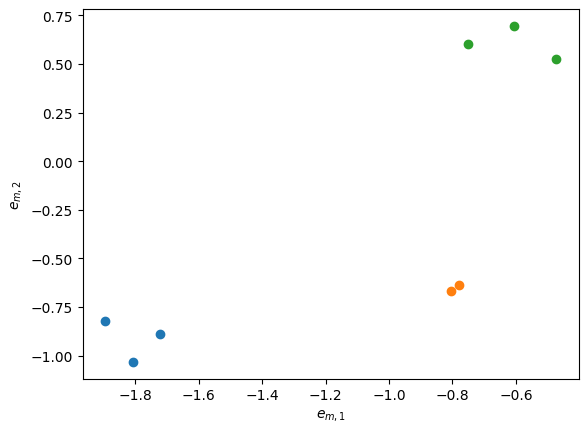

In [4]:
# 1.1)
def generate_examples(list_m, n_e, sigma=0.1):
    centers = np.random.randn(len(list_m), n_e) # puntos centro de distrib normal de n_e dimensiones
    print(centers)
    n_s = len(list_m) # neuronas de salida
    M = sum(list_m) # numero total de puntos, M en R^n_e
    e = np.zeros((M, n_e + 1))
    s = np.zeros((M, n_s))
    m = 0
    
    for c in range(n_s):
        for r in range(list_m[c]):
            e[m, :n_e] = centers[c, :] + sigma * np.random.randn(n_e)
            e[m, -1] = -1.0     # ultimo elemento de e para que sea el bias	
            s[m, c] = 1
            m += 1

    return e, s

# 1.2)
e, s = generate_examples([3, 2, 3], 2)

plt.figure()

colors = plt.cm.tab10.colors

for m in range(e.shape[0]):
    plt.scatter(e[m, 0], e[m, 1], c=[colors[np.argmax(s[m, :])]], label="")   

plt.xlabel(r'$e_{m, 1}$')
plt.ylabel(r'$e_{m, 2}$')
plt.show()

In [5]:
# 2.1)

def train(e, s, g, dg, num_epochs, eta=0.1, w=None):
    M, n_e = e.shape
    n_s = s.shape[1]
    
    # Crear pesos
    if w is None:
        w = 0.1 * np.random.randn(n_s, n_e)
        w[:, -1] = -1.0
    else:
        assert w.shape == (n_s, n_e), "La matriz de pesos debe coincidir con el tamaño de entrada."

    # Entrenamiento
    h = np.zeros(n_s)
    for epoch in range(num_epochs):
        # Calcular h_jm
        for m in range(M):
            h[:] = 0.0
            for j in range(n_s):
                h[j] += np.dot(w[j, :], e[m, :])

            # Actualizar w
            E = 0.0
            for p in range(n_s):
                A = g(h[p]) - s[m, p]
                E += A ** 2
                for q in range(n_e):
                    w[p, q] -= eta * A * dg(h[p]) * e[m, q]

        E *= 0.5
        if epoch % (num_epochs // 10) == 0:
            print(f"Epoch {epoch} Error {E}")

    return w

def eval(w, g, x):
    n_s, n_e = w.shape
    y = np.zeros(n_s)
    
    for j in range(n_s):
        h = 0
        for i in range(n_e):
            h += w[j, i] * x[i]
        y[j] = g(h)

    return y

In [6]:
def g(h): # ReLU
    if h>0:
        return h 
    else:
        return 0

def dg(h):
    if h>0:
        return 1
    else:
        return 0

In [7]:
w = train(e, s, g, dg, 10000, 0.02)

Epoch 0 Error 0.5675763245916632
Epoch 1000 Error 0.0022206660950392547
Epoch 2000 Error 0.0022277074522630367
Epoch 3000 Error 0.002231733263253042
Epoch 4000 Error 0.0022340337439931963
Epoch 5000 Error 0.002235347914328925
Epoch 6000 Error 0.0022360985156344697
Epoch 7000 Error 0.0022365271864682713
Epoch 8000 Error 0.0022367719879197354
Epoch 9000 Error 0.002236911782397121


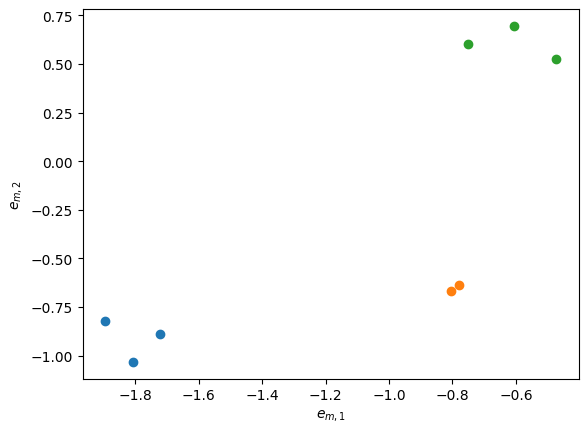

In [ ]:
plt.figure()

colors = plt.cm.tab10.colors

for m in range(e.shape[0]):
    y = eval(w, g, e[m, :])
    b = np.argmax(y)
    #print(f'b:{b}')
    c = np.argmax(s[m, :])
    #print(f'c:{c}')
   #plt.scatter(e[m, 0], e[m, 1], c=np.argmax(s[m, :]), label="")
    plt.scatter(e[m, 0], e[m, 1], c=[colors[np.argmax(s[m, :])]] )  
    plt.scatter(e[m, 0], e[m, 1], edgecolor=f'C{b}', facecolor='none', s=200) # bordes 

plt.xlabel(r'$e_{m, 1}$')
plt.ylabel(r'$e_{m, 2}$')
plt.show()

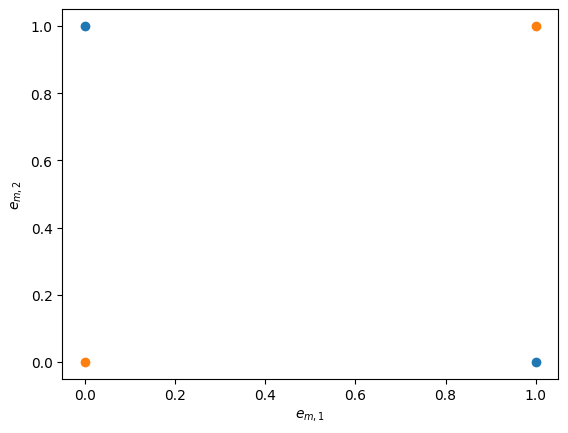

In [10]:
# 3.1)

M = 4
n_e = 2
n_s = 2
e = np.zeros((M, n_e + 1))
s = np.zeros((M, n_s))

e[0,:] = [0, 0, -1]
e[1,:] = [0, 1, -1]
e[2,:] = [1, 0, -1]
e[3,:] = [1, 1, -1]

s[0,:] = [0, 1]
s[1,:] = [1, 0]
s[2,:] = [1, 0]
s[3,:] = [0, 1]


plt.figure()

colors = plt.cm.tab10.colors

for m in range(e.shape[0]):
    plt.scatter(e[m, 0], e[m, 1], c=[colors[np.argmax(s[m, :])]], label="")   

plt.xlabel(r'$e_{m, 1}$')
plt.ylabel(r'$e_{m, 2}$')
plt.show()

In [11]:
w = train(e, s, g, dg, 100000, 0.02)

Epoch 0 Error 0.44134470595488245
Epoch 10000 Error 0.2603082049146187
Epoch 20000 Error 0.2603082049146187
Epoch 30000 Error 0.2603082049146187
Epoch 40000 Error 0.2603082049146187
Epoch 50000 Error 0.2603082049146187
Epoch 60000 Error 0.2603082049146187
Epoch 70000 Error 0.2603082049146187
Epoch 80000 Error 0.2603082049146187
Epoch 90000 Error 0.2603082049146187


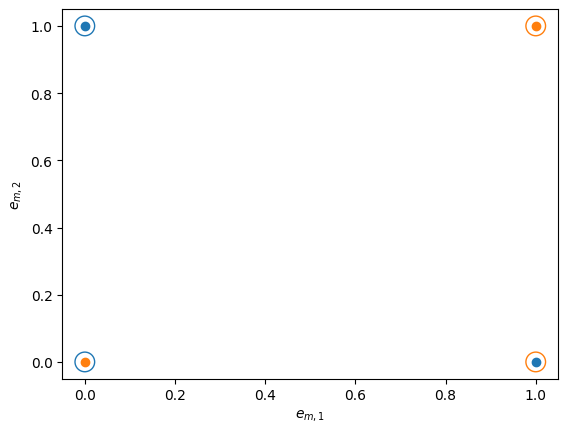

In [12]:
plt.figure()

colors = plt.cm.tab10.colors

for m in range(e.shape[0]):
    y = eval(w, g, e[m, :])
    b = np.argmax(y)
    c = np.argmax(s[m, :])

    plt.scatter(e[m, 0], e[m, 1], c=[colors[np.argmax(s[m, :])]] )   
    plt.scatter(e[m, 0], e[m, 1], edgecolor=f'C{b}', facecolor='none', s=200)

plt.xlabel(r'$e_{m, 1}$')
plt.ylabel(r'$e_{m, 2}$')
plt.show()